**Анализ оттока клиентов банка "Метанпром"**

Презентация: https://drive.google.com/file/d/1ISa92rRpsm21evQOuq1lsx50uhiuqwhy/view?usp=sharing

Дашборд: https://public.tableau.com/app/profile/paul.p3293/viz/Metanprombank_customer/Dashboard1

Описание проекта:

Банку "Метанпром" необходимо уменьшить отток клиентов.  Наша задача —  проанализировав данные, составить портрет клиентов, которые склонны к уходу из банка и дать рекомендации по снижению оттока клиентов. Для этого необходимо выполнить следующие этапы:   

* выделить основные признаки, наиболее сильно влияющие на отток;
* составить портрет клиента склонного к уходу из банка;
* сформулировать и проверить гипотезы, которые помогут решить поставленную задачу;
* сделать основные выводы и дать рекомендации по снижению оттока клиентов.

В нашем распоряжении датасет, содержащий данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.  
Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.


**Последовательность действий по выполнению проекта:**

I. Загрузить и изучить данные:
  - импорт необходимых библиотек для работы;
  - загрузка данных и получение общей информации о них;
  - краткий вывод о имеющихся данных.
  
II. Предобработка данных:
  - проверить название колонок и тип данных в столбцах;
  - сделать проверку на наличие дубликатов;
  - проверить данные на наличие выбросов и аномальных значений;
  - поиск и обработка пропущенных значений;
  - вывод по итогам предобработки данных.
  
III. Исследовательский анализ данных:   
  - изучить средние значения и стандартное отклонение в данных;
  - проверить средние значения признаков по группам ушедших и оставшихся клиентов;
  - визуализировать значения признаков в разбивке по двум группам - ушедших и оставшихся клиентов;
  - построить матрицу корреляций признаков;
  - составить портрет клиента склонного к уходу;
  - выводы по итогам исследовательского анализа данных.  
  
IV. Проверка гипотез:
  - проверить гипотезу о различии между средним доходом клиентов, которые ушли и теми, кто остался;
  - проверка иных гипотез, способных помочь в решении поставленных задач;
  - выводы по этапу проверки гипотез.  
  
V. Общий вывод и рекомендации по снижению оттока клиентов.

## Загрузка и изучение данных.

### Импорт необходимых библиотек.

In [1]:
import pandas as pd
import seaborn as sns
import textwrap as tw
from matplotlib import pyplot as plt
from scipy import stats as st

### Загрузка данных и получение общей информации о них.

In [2]:
try:
    df = pd.read_csv('/datasets/bank_dataset.csv')
except:
    df = pd.read_csv('C:\datasets\bank_dataset.csv')

In [3]:
print(df.shape)
df.head()

(10000, 12)


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Выводы о имеющихся данных.

* Таблица содержит 12 колонок и 10000 строк;
* В названиях колонок нет единого стиля - присутствует верблюжий регистр и заглавные буквы;
* Столбец balance содержит 3617 пропусков;
* Тип данных во всех колонках верный и соответствует значениям в них.

## Предобработка данных.

### Проверка названий колонок и типа данных в столбцах.

Как было установлено ранее, тип данных во всех столбцах верный, название колонок необходимо привести к нижнему регистру и применить змеиный регистр, где это необходимо.

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.rename(columns={'userid':'user_id','creditcard':'credit_card'},inplace=True)

In [7]:
df

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


### Проверка на наличие дубликатов.

In [8]:
print('Количество дубликатов в датасете:',sum(df.duplicated()))

Количество дубликатов в датасете: 0


Явных дубликатов в таблице нет, также проверим столбец user_id который должен содержать только уникальных пользователей.

In [9]:
print('Количество уникальных значений в столбце user_id:',df['user_id'].nunique())

Количество уникальных значений в столбце user_id: 10000


В датасете представлены только уникальные пользователи, повторяющих данных о пользователе нет.

### Проверка на наличие выбросов и аномальных значений.

In [10]:
#Посмотрим количество каждого значения в столбцах с категориальными данными
for column in ['city','gender','objects','products','credit_card','loyalty','churn']:
    print(column)
    print (df[column].value_counts())
    print()

city
Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

gender
М    5457
Ж    4543
Name: gender, dtype: int64

objects
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: objects, dtype: int64

products
1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

credit_card
1    7055
0    2945
Name: credit_card, dtype: int64

loyalty
1    5151
0    4849
Name: loyalty, dtype: int64

churn
0    7963
1    2037
Name: churn, dtype: int64



 * колонка city:
   - половина пользователей проживает в Ярославле, остальная часть поровну в Ростове Великом и Рыбинске, такое распределение вполне логично учитывая размеры самих городов.  
   
 
 * колонка gender:
   * мужчин среди клиентов Банка немного больше чем женщин, но явно перевеса по половому признаку нет.  
   
 
 * колонка objects:
   * чаще встречаются клиенты с количеством объектов в собственности от 1 до 9, реже у кого 10 либо объектов в собственности нет.  
   
   
 * колонка products:
   * подавляющее большинство клиентов пользуются либо одним, либо двумя продуктами Банка.  
   
   
 * колонка credit_card:
   * более 70% клиентов имеют кредитные карты в Банке.  
   
   
 * колонка loyalty:
   * чуть больше половины пользователей являются активными клиентами.  
   
   
 * колонка churn:
   * из всех представленных данных отток клиентов составил 20%.
 
В столбцах содержащих категориальные данные каких-то странных значений нет и распределение по количеству значений не вызывает подозрений.
  
  
   

Для дальнейшего удобства работы с данными, заменим значения в столбце gender следующим образом : 'М' - будет соответствовать 1, а 'Ж' - 0. Такие изменения помогут применить метод describe к данной колонке. 

In [11]:
df['gender'].replace({'М':1,'Ж':0},inplace=True)

Проверим не изменились ли данные после замены

In [12]:
df['gender'].value_counts()

1    5457
0    4543
Name: gender, dtype: int64

Данные остались неизменными.

Далее рассмотрим столбцы, содержащие количественные данные. 

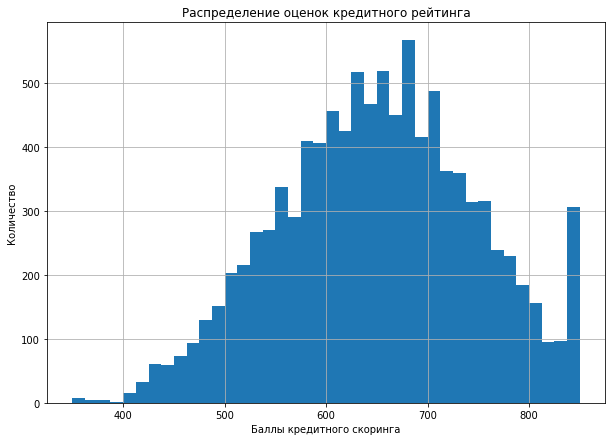

In [13]:
plt.figure(figsize=(10,7))
plt.hist(df['score'],bins=40)
plt.title('Распределение оценок кредитного рейтинга')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

In [14]:
df['score'].value_counts()

850    233
678     63
655     54
667     53
705     53
      ... 
412      1
351      1
365      1
373      1
423      1
Name: score, Length: 460, dtype: int64

Стоит отметить, что довольно много клиентов имеют максимальный уровень в 850 баллов, при этом нельзя назвать это аномальным явлением, с данными в этом столбце всё нормально.

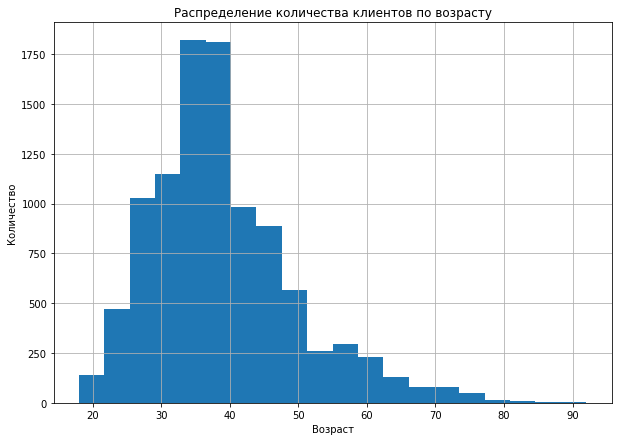

In [15]:
plt.figure(figsize=(10,7))
plt.hist(df['age'],bins=20)
plt.title('Распределение количества клиентов по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

In [16]:
df['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

Как видно, большинство клиентов имеют возраст от 25 до 45, что вполне логично. Минимальный возраст клиента Банка 18, а максимальный 92, с данными по данному столбцу все нормально.

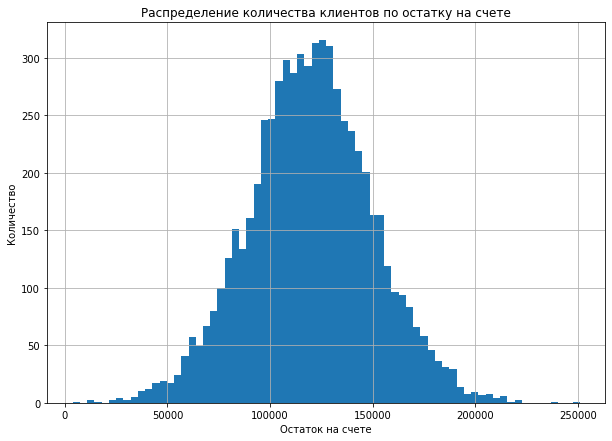

In [17]:
plt.figure(figsize=(10,7))
plt.hist(df['balance'],bins=70)
plt.title('Распределение количества клиентов по остатку на счете')
plt.xlabel('Остаток на счете')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

Большинство клиентов банка имеют на своём счету от 90000 до 150000. Остаток на балансе может быть 0, поэтому низкие значения принимаем как нормальные. Максимальный остаток на счете 250000, что также нельзя назвать аномальным.

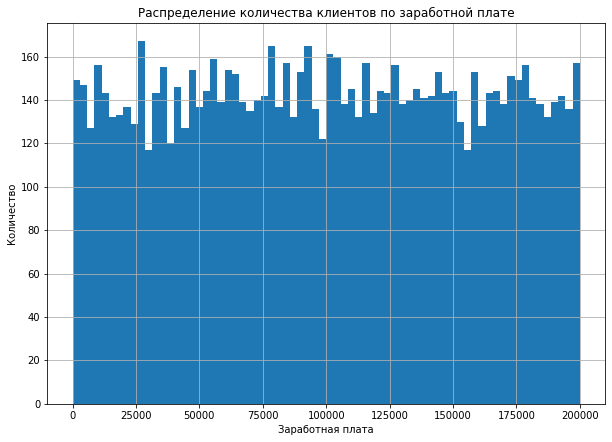

In [18]:
plt.figure(figsize=(10,7))
plt.hist(df['estimated_salary'],bins=70)
plt.title('Распределение количества клиентов по заработной плате')
plt.xlabel('Заработная плата')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

In [19]:
df['estimated_salary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

In [20]:
print('Количество клиентов с заработной платой менее 5000:',len(df[df['estimated_salary']<5000]))

Количество клиентов с заработной платой менее 5000: 264


Зарплаты варьируются от 11 до 200000. В Банке обслуживаются 264 клиента, у которых заработная плата менее 5000, что выглядит довольно странным, но мы не можем знать наверняка по какому приницу заполнялся этот столбец и доля таких клиентов составляет менее 3% от общего числа, поэтому для того, чтобы не терять целостность датасета мы не будем удалять данные таких клиентов.

### Поиск и обработка пропущенных значений.

In [21]:
df.isna().sum()

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

Мы обнаружили 3617 пропусков по столбцу с данными об остатке денежных средств на счете. Можно было бы попробовать заменить пропуски,например, средним значением в разбивке клиентов на определенные группы или категории, но я считаю это приведет к искажению данных и не будет являться адекватной и объективной заменой пропусков. Мы не будем заполнять пропуски, ввиду того, что заполнить количество денежных средств на остатке на счете правдоподобными цифрами, не предоставляется возможным.

### Выводы по этапу предобработки данных.

* В названиях колонок были обнаружены стилистические ошибки - исправлено путем приведения к единому нижнему регистру и использования змеиного регистра;
* Проверка на наличие дубликатов показала их отсутствие;
* В ходе изучения датасета на аномалии и выбросы было обнаружено, что в датасете имеются клиенты с зарплатой ниже 5000, однако, учитывая что их немного, было принято решение их оставить.
* В столбце balance были обнаружены пропуски, но ввиду того, что адекватную замену пропуску сделать невозможно, было принято решения пропуски оставить.


## Исследовательский анализ данных.

### Анализ средних значений и стандартного отклонения в данных.

In [22]:
df.describe().drop('user_id', axis=1).round(2).T

,count,mean,std,min,25%,50%,75%,max
score,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
gender,10000.0,0.55,0.50,0.00,0.00,1.00,1.00,1.00
age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
objects,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
balance,6383.0,119827.49,30095.06,3768.69,100181.98,119839.69,139512.29,250898.09
products,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
credit_card,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
loyalty,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
churn,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


Выводы:
  * Средняя оценка кредитного скоринга 650;
  * Распределение по полу показывает, что мужчин среди клиентов больше чем женщин, около 55%;
  * Средний возраст клиентов 39 лет, стандартное отклонение по возрасту 10 лет;
  * В среднем клиенты имеют 5 объектов в собственности;
  * Средний показатель остатка денежных средств на счете 120 000, при стандартном отклонении 30 000;
  * Подавляющее число клиентов пользуются 1 или 2 продуктами;
  * 71% людей, находящихся на обслуживании в Банке, имеют кредитную карту;
  * Более 50% пользователей имеют статус активного клиента;
  * Заработная плата имеет существенный разброс от 11 до 200 000, при этом средняя зарплата 100 000, а стандартное отклонение 57 000;
  * Из представленных данных 20% клиентов покинули банк;

In [23]:
df

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,0,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,0,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,0,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,0,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,1,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,1,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,0,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,1,42,3,75075.31,2,1,0,92888.52,1


### Проверка средних значений признаков по группам ушедших и оставшихся клиентов.

In [24]:
df.drop('user_id', axis=1).groupby('churn').agg('mean').round(2).T

churn,0,1
score,651.85,645.35
gender,0.57,0.44
age,37.41,44.84
objects,5.03,4.93
balance,119535.86,120746.97
products,1.54,1.48
credit_card,0.71,0.70
loyalty,0.55,0.36
estimated_salary,99738.39,101465.68


In [25]:
df.groupby('city').agg({'churn':'mean'})

,churn
city,
Ростов Великий,0.324432
Рыбинск,0.166734
Ярославль,0.161548


Выводы:
  * Уровень кредитного скоринга практически идентичен у людей оставшихся в банке и покинувших его;
  * Распределение по полу показывает, что среди оставшихся в банке доля мужчин 57%, а среди ушедших в отток 44% - это потенциально важный признак, который может помочь составить портрет человека, склонного к уходу;
  * Средний возраст ушеших клиентов и оставшихся довольно серьезно отличается - на 7 лет, 37 лет - средний возраст оставшихся и 44 года ушедших. Можно расценивать признак возраста как сильно влияющий на вероятность ухода клиента из Банка;
  * Количество объектов не поменялось, в среднем, у людей двух групп 5 объектов в собственности;
  * Сумма средств, находящаяся на счете, также не изменилась, в среднем у людей двух групп - это 120 000;
  * Количество имеющихся продуктов вряд ли влияет на вероятность ухода клиента из Банка, т.к. средние значения равны для двух групп;
  * Наличие кредитной карты также показывает одинаковый уровень для группы ушедших и оставшихся;
  * Признак активности клиента дает нам информацию о том, что больше активных клиентов в группе оставшихся их 55%, а в группе ушедших только 35% активных пользователей. Предварительно выделим этот признак как важный для нашего исследования;
  * Заработная плата немного отличается у двух групп и тенденция такая, что чем выше у человека зарплата, тем больше вероятность нахождения его в группе ушедших. Хотя разница не очень большая, данный признак стоит рассмотреть детальнее;     
  * Интересные результаты показывает доля ушедших в разбивке по городам - в Рыбинске и Ярославле доля ушедших в отток составляет 16%, а в Ростове Великом 32%, разница в 2 раза.


### Визуализация значений признаков в разбивке по двум группам - ушедших и оставшихся клиентов.

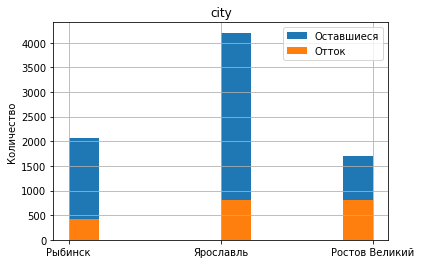

city,Ростов Великий,Рыбинск,Ярославль
churn,0.32,0.17,0.16


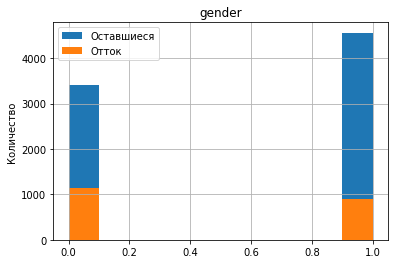

gender,0,1
churn,0.25,0.16


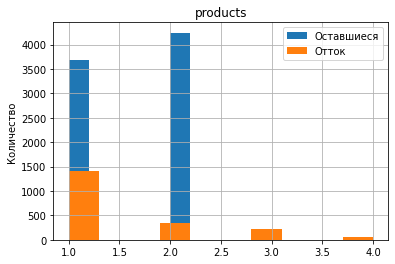

products,1,2,3,4
churn,0.28,0.08,0.83,1.0


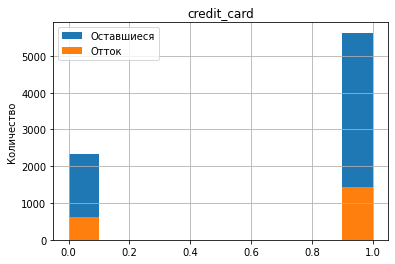

credit_card,0,1
churn,0.21,0.2


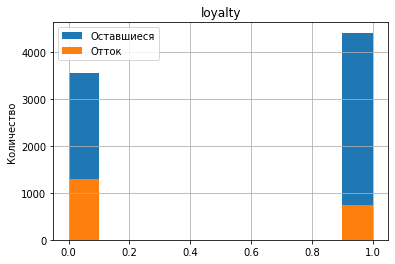

loyalty,0,1
churn,0.27,0.14


In [26]:
# Построим гистограмму для колонок которые содержат от 2 до 4 значений
df_hist = ['city', 'gender', 'products', 'credit_card', 'loyalty']
for column in df_hist:
    df.groupby('churn')[column].hist()
    plt.title(column)
    plt.legend(['Оставшиеся', 'Отток'])
    plt.ylabel('Количество')
    plt.show()
    display(df.drop('user_id', axis=1).groupby(column).agg({'churn':'mean'}).round(2).T)

Подробнее рассмотрим столбец с количеством продуктов у клиентов

In [27]:
df.groupby('products').agg({'churn':'count','churn':'mean'})

,churn
products,
1,0.277144
2,0.075817
3,0.827068
4,1.000000


In [28]:
print('Количество клиентов имеющих 3 или 4 продукта в Банке:', len(df[df['products']>2]))

Количество клиентов имеющих 3 или 4 продукта в Банке: 326


Выводы:
 * Гистограмма в разбивке по городам подтверждает, что у отделений, расположенных в Ростове Великом, есть проблемы с оттоком клиентов, отток составляет 32% против 16% в Ярославле и Рыбинске;
 * График в разбивке по полу также подтверждает ранее сделаные выводы - женщины чаще попадают в группу ушедших клиентов, среди женщин доля оттока составляет 25%, а доля оттока среди мужчин 16%;
 * Наличие или отсутствие кредитной карты не влияет на отток, т.к. пропорции ушедших и оставшихся в разбивке по наличию кредитной карты сопоставимы, 21% у тех кого нет кредитной карты и 20% у кого она есть;
 * Гистограмма в разбивке на активных и остальных клиентов явно подтверждает, что активные клиенты реже попадают в отток, доля оттка у неактивных клиентов 27%, а у активных 14%;
 * Довольно интересную картину показывает график в разбивке на группы по количеству имеющихся продуктов - клиентов с 3 или 4 продуктами в Банке 326 человек, что довольно немного (3% от общего числа), однако эти пользователи имеют колоссальный процент ушедших клиентов из Банка 83% и 100% соответственно. Решение по этом признаку стоит принять позже.
    

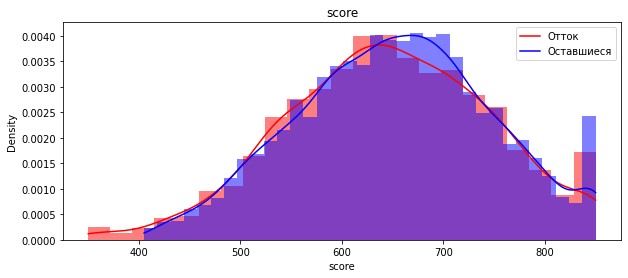

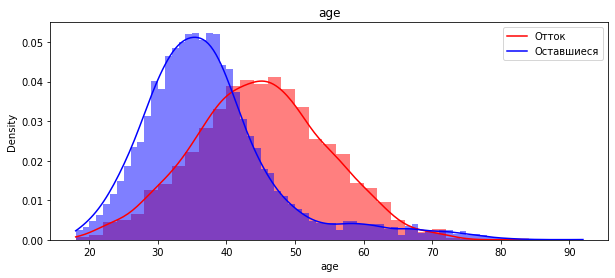

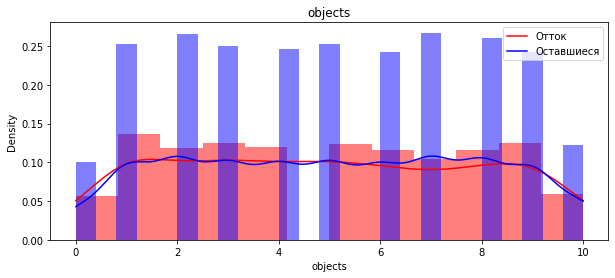

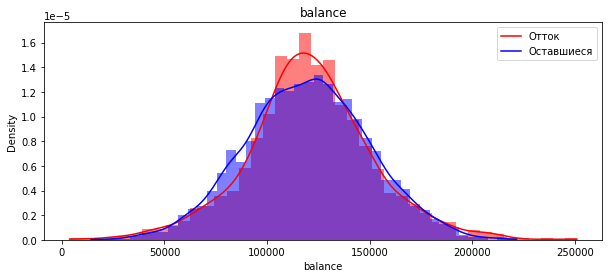

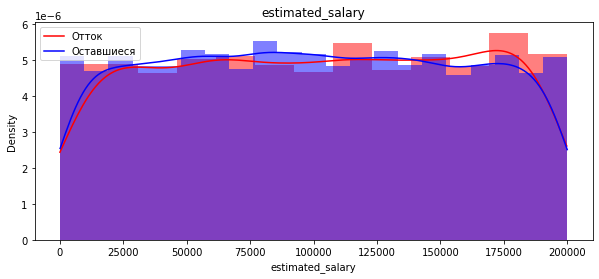

In [29]:
#Построим столбчатую диаграмму для остальных колонок, разделив пользователей на оставшихся и ушедших из Банка
for column in df.columns.drop({'churn','user_id'}):
    if column not in df_hist:
        plt.figure(figsize=(10,4)) 
        plt.title(column)
        sns.histplot(df[df['churn']==1][column],color='red',kde=True,stat="density", linewidth=0)
        sns.histplot(df[df['churn']==0][column],color='blue',kde=True,stat="density", linewidth=0)
        plt.legend(['Отток', 'Оставшиеся'])
        plt.show()

Выводы:
 * График распределения ушедших и оставшихся клиентов в разбивке по уровню кредитного скоринга, доказывает нам что ранее сделаные выводы верны и этот показатель не влияет на отток;
 * Распределение по возрасту позволяет сделать однозначные выводы - пик по оставшимся клиентам приходится на 30-40 лет, а пик по людям ушедших в отток на 40-60, это подтверждает наши мысли о том, что люди постарше склонны к уходу из Банка;
 * Количество объектов в собственности не влияет на вероятность ухода из Банка, график это подтверждает;
 * График по остатку денежных средств на счете не дает нам однозначного предоставления, с одной стороны, распределение ушедших и оставшихся клиентов близко друг к другу, однако, в диапозоне 100000-140000 доля ушедних в отток больше оставшихся.
 * График заработной платы сопоставим, но ближе к максимальным значениям видно, что группа ушедших клиентов больше оставшихся.

### Матрица корреляций признаков.

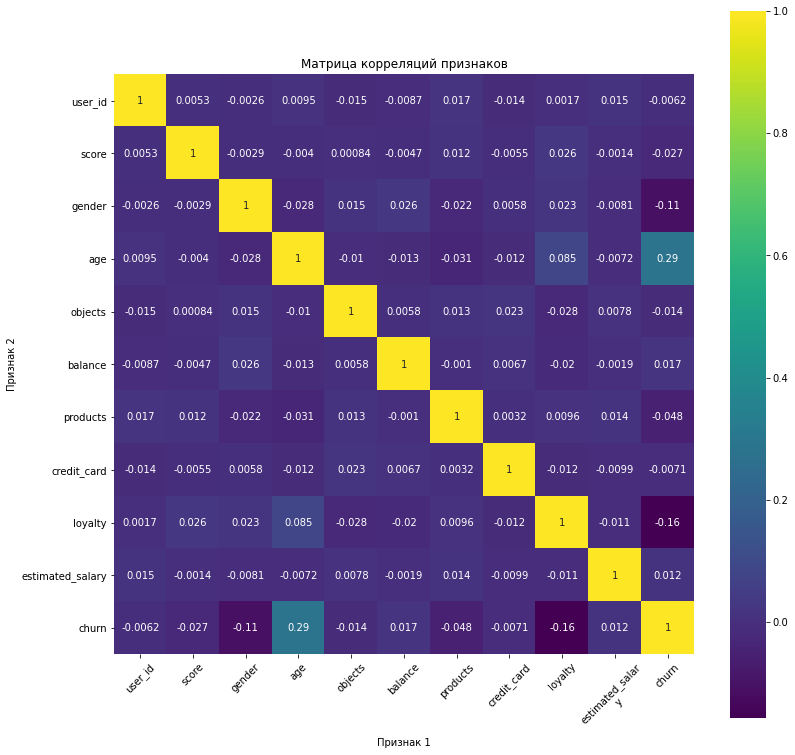

In [30]:
cm = df.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots(figsize=(13, 13))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True,cmap='viridis')
max_width = 15
ax.set_xticklabels(tw.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
ax.tick_params(axis='x', rotation=45)
plt.title('Матрица корреляций признаков')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

Выводы:
 * Наибольшую корреляцию факт оттока клиента имеет с признаком возраста - это подтверждает наши мысли о различии в возрасте групп ушедших и оставшися;
 * Второй признак по уровню корреляции оттока клиента имеет признак активности клиента, ранее мы делали схожее предположение;
 * Довольно сильную связь факт оттока клиента имеет с признаком пола, ранее мы делали схожее предположение;
 * Отдельно стоит отметить высокий уровень корреляции возраста с активностью клиентов. Судя по всему, люди постарше чаще пользуются услугами Банка.
    

### Портрет клиента склонного к уходу.

Основываясь на ранее сделанных выводах по анализу средних значений, графиков и матрицы корреляции признаков, мы предположим, что клиент, склонный к уходу из Банка, имеет следующие основные характеристики:  

 Женщина старше 40 лет, проживающая в городе Ростов Великий, которая не имеет статуса активного клиента.  


### Выводы по итогам исследовательского анализа данных. 

По итогу исследовательского анализа данных стоить выделить следующие основные моменты:  
   - В городе Ростов Великий есть проблемы из-за высокого уровня оттока клиентов;
   
    
   - Признаки, которые явно могут влиять на отток клиента:  
    
      * Возраст - люди старше больше склонны к уходу;  
      
      * Активность клиента - активные клиенты реже попадают в группу ушедших;  
      
      * Пол - женщины чаще покидают Банк.  
      
      
   - Признаки, на которые можно обратить внимание:  
    
      * Количество продуктов у клиента;  
      
      * Заработная плата.
     
       

## Проверка гипотез.

Основываясь на исследовательском анализе данных и выделенных потенциально весомых признаках, влияющих на отток клиентов, сформулируем и проверим различные статистические гипотезы. Примем за уровень статистической значимости стандартное значение 0.05 - вероятность совершить ошибку первого рода, т.е. вероятность отклонить нулевую гипотезу, если она истинна составляет 5%. Для удобства проверки напишем функцию, которую далее будем применять для проверки всех гипотез.

In [31]:
alpha = 0.05

In [32]:
def hypothesis_check (column):
    column_stay = df[df['churn']==0][column]
    column_leave = df[df['churn']==1][column]
    results = st.ttest_ind(
    column_stay,
    column_leave)
    result = print('p-значение:', results.pvalue)
    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")  
    else:
        print("Не получилось отвергнуть нулевую гипотезу")
    return result

### Проверка гипотезы о различии между средним доходом клиентов, которые ушли и теми, кто остался.

Сформулируем нулевую и альтернативную гипотезы:  

Нулевая гипотеза - средняя заработная плата ушедших клиентов и оставшихся одинакова.  
Альтернативная гипотеза - между средней заработной платой ушедших клиентов и оставшихся есть значимая разница.

In [33]:
hypothesis_check ('estimated_salary')

p-значение: 0.22644042802223352
Не получилось отвергнуть нулевую гипотезу


Выводы:  

Чем выше p-value, тем скорее отклонение нулевой гипотезы будет ошибочным.  

Значение p-value значительно выше критического уровня статистической значимости (0.05).  
Исходя из результатов теста по определению статистической значимости различий между группой ушедших и группой оставшихся клиентов, у нас нет оснований считать среднюю заработную плату этих групп разной. 

### Проверка иных гипотез, способных помочь в решении поставленных задач.

Далее мы проверим еще 4 гипотезы, используя выделенные признаки на этапе исследовательского анализа данных:  
   * Гипотеза о различии среднего возраста ушедших и оставшихся клиентов;    
   * Гипотеза о разнице долей активных клиентов в группах ушедших и оставшихся клиентов;  
   * Гипотеза о разнице долей мужчин в группах ушедших и оставшихся клиентов;  
   * Гипотеза о разнице среднего количества продуктов ушедших и оставшихся клиентов;
   

**Сформулируем нулевую и альтернативную гипотезы для признака возраста:**  

Нулевая гипотеза - средний возраст ушедших клиентов и оставшихся одинаков.  
Альтернативная гипотеза - между средним возрастом ушедших клиентов и оставшихся есть значимая разница.

In [34]:
hypothesis_check ('age')

p-значение: 1.2399313093427738e-186
Отвергаем нулевую гипотезу


Значение p-value ниже критического уровня статистической значимости (0.05).    
Исходя из результатов теста по определению статистической значимости различий между группой ушедших и группой оставшихся клиентов, у нас есть основания считать средний возраст в этих групп разным. 

**Сформулируем нулевую и альтернативную гипотезы для признака активности клиента:**  

Нулевая гипотеза - доли активных клиентов в группах ушедших и оставшихся клиентов одинаковы.  
Альтернативная гипотеза - между долями активных клиентов в группах ушедших и оставшихся клиентов есть значимая разница.

In [35]:
hypothesis_check ('loyalty')

p-значение: 1.348268516485762e-55
Отвергаем нулевую гипотезу


Значение p-value ниже критического уровня статистической значимости (0.05).    
Исходя из результатов теста по определению статистической значимости различий между группой ушедших и группой оставшихся клиентов, у нас есть основания считать доли активных клиентов в этих групп разными. 

**Сформулируем нулевую и альтернативную гипотезы для признака пола клиента:**  

Нулевая гипотеза - доли мужчин в группах ушедших и оставшихся клиентов одинаковы.  
Альтернативная гипотеза - между долями мужчин в группах ушедших и оставшихся клиентов есть значимая разница.

In [36]:
hypothesis_check ('gender')

p-значение: 1.2585045636809457e-26
Отвергаем нулевую гипотезу


Значение p-value ниже критического уровня статистической значимости (0.05).    
Исходя из результатов теста по определению статистической значимости различий между группой ушедших и группой оставшихся клиентов, у нас есть основания считать доли мужчин в этих групп разными. 

**Сформулируем нулевую и альтернативную гипотезы для количества продуктов у клиентов:**  

Нулевая гипотеза - среднее количество продуктов ушедших клиентов и оставшихся одинаково.  
Альтернативная гипотеза - между средним количеством продуктов ушедших клиентов и оставшихся есть значимая разница.

In [37]:
hypothesis_check ('products')

p-значение: 1.717333004804293e-06
Отвергаем нулевую гипотезу


Значение p-value ниже критического уровня статистической значимости (0.05).    
Исходя из результатов теста по определению статистической значимости различий между группой ушедших и группой оставшихся клиентов, у нас есть основания считать среднее количество продуктов у клиентов в этих групп разным. 

### Выводы по этапу проверки гипотез.

Были сформулированы и проверены 5 статистических гипотез, по итогам которых было выявлено:
  * у нас нет оснований считать среднюю заработную плату в группе ушедших и оставшихся клиентов разной;
  * по итогам проверки гипотезы о различии среднего возраста ушедших и оставшихся клиентов, мы получили значение, которое дает основание считать, что средний возраст в этих двух группах различается;
  * по итогам проверки гипотезы о разнице долей активных клиентов в группах ушедших и оставшихся клиентов, мы получили результат, который дает основание считать, что доли активных клиентов в этих двух группах различаются;
  * по итогам проверки гипотезы о разнице долей мужчин в группах ушедших и оставшихся клиентов, мы получили результат, который дает основание считать, что доли мужчин в этих двух группах различаются;
  * по итогам проверки гипотезы о разнице среднего количества продуктов в группах ушедших и оставшихся клиентов, мы получили результат, который дает основание считать, что между средним количеством продуктов ушедших клиентов и оставшихся есть значимая разница.
    

## Выводы и рекомендации по снижению оттока клиентов.

**Общие выводы:**
* В представленном датасете была проведена предобработка данных, включающая:
  * Проверку названий колонок и типа данных в столбцах;
  * Анализ данных на предмет наличия дубликатов;
  * Поиск пропусков и аномальных значений;
  * Поиск и обработка пропущенных значений.
  

* Следующим этапом был произведен исследовательский анализ данных, по результатам которого выделены ключевые признаки клиентов способные оказывать влияние на их отток:
  * В городе Ростов Великий есть проблемы из-за высокого уровня оттока клиентов;
  * Возраст - люди старше 40 лет больше склонны к уходу;    
  * Активность клиента - активные клиенты реже попадают в группу ушедших;      
  * Пол - женщины чаще покидают Банк;
  * Клиенты пользующиеся большим количеством продуктов банка реже попадают в отток.
  
  
* Третий этап представлял проверку гипотез:
  * Нет оснований считать среднюю заработную плату в группе ушедших и оставшихся клиентов разной;
  * **По итогам проверки гипотезы о различии среднего возраста ушедших и оставшихся клиентов, мы получили результат, который дает основание считать, что средний возраст в этих двух группах различается;**
  * **По итогам проверки гипотезы о разнице долей активных клиентов в группах ушедших и оставшихся клиентов, мы получили результат, который дает основание считать, что доли активных клиентов в этих двух группах различаются;**
  * **По итогам проверки гипотезы о разнице долей мужчин в группах ушедших и оставшихся клиентов, мы получили результат, который дает основание считать, что доли мужчин в этих двух группах различаются;**
  * **По итогам проверки гипотезы о разнице среднего количества продуктов в группах ушедших и оставшихся клиентов, мы получили результат, который дает основание считать, что между средним количеством продуктов ушедших клиентов и оставшихся есть значимая разница.**

**Рекомендации по снижению оттока клиентов:**

 1) В городе Ростов Великий был обнаружен высокий уровень оттока клиентов. Возможно, это связано с грубым, бестактным обслуживанием клиентов. Предлагаю провести анонимный опрос с целью выявить недобросовестных менеджеров;  
 
 2) Клиенты до 40 лет реже уходят из Банка и наоборот, возрастные клиенты чаще попадают в отток. Можно предположить, что это происходит из-за сложностей взаимодействия возрастных пользователей с мобильным клиент-Банком или трудностями посещения отделений Банка. Предлагаю оптимизировать мобильное приложение, сделать его более доступным и понятным, а также увеличить качество обслуживания в офисах Банка, например, уменьшить время ожидания клиентов в очереди;   
 
 3) Активные клиенты Банка реже попадают в отток, что логично. Возможно, это происходит из-за плохой обратной связи с клиентом. Рекомендую предлагать неактивным клиентам выгодные и интересные продукты, а также узнавать уровень удовлетворенности обслуживанием путем телефонных звонков, либо через e-mail рассылку;   
 
 4) Было выявлено, что женщины чаще уходят из Банка, чем мужчины. Можно предположить, что это связано с низким уровнем спецпредложений для женщин. Предлагаю разделить категории повышенного кэшбека по картам для мужчин и женщин, например, женщинам предлагать выбор из категорий: салоны красоты и спа, фитнес центры, супермаркеты, кафе и рестораны, товары для дома, искусство, одежда и обувь, развлечения;   
 
 5) Клиенты, которые пользуются двумя продуктами Банка реже попадают в отток, чем те, кто пользуется одним продуктом. Предположим, что клиенту не хватает выгодных условий по какой-либо услуге. Как правило, одним из продуктов у клиента является банковская карточка (дебетовая/кредитная). Предлагаю улучшить процентные ставки по депозитам - это позволит удержать клиентов и добавить многим еще один продукт в использовании.  
 

Презентация: https://drive.google.com/file/d/1ISa92rRpsm21evQOuq1lsx50uhiuqwhy/view?usp=sharing

Дашборд: https://public.tableau.com/app/profile/paul.p3293/viz/Metanprombank_customer/Dashboard1